In [ ]:
!pip install mrmr_selection

from pandas import read_excel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

from mrmr import mrmr_classif

import sklearn
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, max_error
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, mean_absolute_percentage_error, d2_tweedie_score

In [ ]:
df = pd.read_excel('/content/Group_prediction_by_Regressor-Dataset_1.xlsx')
df.drop('Group SSC', axis=1, inplace=True)
df.head()

,Gender,Father Highest Academic Qualification,Mother Highest Academic Qualification,Father Profession,Mother Profession,Father average monthly income,Mother average monthly income,How many siblings do you have,District Currently you are living,PEC Result Overall GPA,...,PEC Science,JSC Overall GPA,JSC Bangla,JSC English,JSC Mathematics,JSC BGS,JSC ICT,JSC Religion,JSC Science,Overall GPA SSC
0,0,4,2,0,2,20000,0,3,0,5.0,...,5.0,5.00,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.00
1,0,5,3,2,2,57000,0,1,0,5.0,...,5.0,5.00,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.00
2,0,4,2,1,2,100000,80000,2,1,5.0,...,5.0,4.65,4.0,4.0,5.0,4.0,5.0,4.0,5.0,4.11
3,0,5,5,1,2,400000,100000,1,0,5.0,...,5.0,5.00,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.61
4,1,0,0,1,2,50000,0,3,0,5.0,...,5.0,4.30,4.0,4.0,5.0,5.0,4.0,4.0,5.0,4.50


In [ ]:
df.shape

(174, 25)

In [ ]:
df.corr()

,Gender,Father Highest Academic Qualification,Mother Highest Academic Qualification,Father Profession,Mother Profession,Father average monthly income,Mother average monthly income,How many siblings do you have,District Currently you are living,PEC Result Overall GPA,...,PEC Science,JSC Overall GPA,JSC Bangla,JSC English,JSC Mathematics,JSC BGS,JSC ICT,JSC Religion,JSC Science,Overall GPA SSC
Gender,1.000000,-0.218857,-0.244734,-0.065249,0.049712,0.051030,-0.184813,0.053027,0.070661,-0.166835,...,-0.132308,-0.213611,-0.165628,-0.139721,-0.195346,-0.139832,-0.107484,-0.013410,-0.227040,-0.243864
Father Highest Academic Qualification,-0.218857,1.000000,0.798755,-0.265225,-0.306143,0.173502,0.166746,-0.374415,-0.243976,0.246152,...,0.216170,0.173094,-0.118421,0.259528,0.097031,0.083783,0.102789,0.014738,0.188457,0.043028
Mother Highest Academic Qualification,-0.244734,0.798755,1.000000,-0.217655,-0.426268,0.226112,0.237934,-0.487508,-0.176387,0.294808,...,0.279729,0.161851,-0.100284,0.280702,0.111349,0.102124,0.186683,0.009794,0.133150,0.046688
Father Profession,-0.065249,-0.265225,-0.217655,1.000000,0.178416,-0.066435,-0.024978,0.130171,-0.091226,-0.057564,...,-0.067025,-0.052980,-0.003319,-0.018780,-0.075354,-0.124012,-0.092236,0.001806,-0.078703,0.051051
Mother Profession,0.049712,-0.306143,-0.426268,0.178416,1.000000,-0.102283,-0.288858,0.249496,0.022462,-0.099577,...,-0.082874,-0.087363,-0.030619,-0.025935,-0.016085,-0.115499,0.001025,-0.099748,-0.062185,0.018952
Father average monthly income,0.051030,0.173502,0.226112,-0.066435,-0.102283,1.000000,0.345755,-0.026961,-0.165074,-0.010520,...,0.033042,0.044310,-0.098518,0.119362,0.088011,0.046469,0.033515,0.014462,0.018152,0.053520
Mother average monthly income,-0.184813,0.166746,0.237934,-0.024978,-0.288858,0.345755,1.000000,-0.101168,-0.127837,-0.000324,...,0.047305,0.000110,-0.032741,0.023933,0.051736,0.051484,0.038894,-0.012515,0.054546,0.020689
How many siblings do you have,0.053027,-0.374415,-0.487508,0.130171,0.249496,-0.026961,-0.101168,1.000000,0.108374,-0.141253,...,-0.169178,-0.109226,-0.026470,-0.052193,-0.033504,-0.019821,-0.198786,-0.129599,-0.137793,0.066046
District Currently you are living,0.070661,-0.243976,-0.176387,-0.091226,0.022462,-0.165074,-0.127837,0.108374,1.000000,-0.089890,...,-0.112239,0.020483,0.217302,-0.051451,0.089852,0.074159,-0.051393,0.052644,-0.059920,-0.048066
PEC Result Overall GPA,-0.166835,0.246152,0.294808,-0.057564,-0.099577,-0.010520,-0.000324,-0.141253,-0.089890,1.000000,...,0.767196,0.515838,0.257245,0.428702,0.326342,0.175693,0.266590,0.239823,0.275904,0.273290


<Axes: >

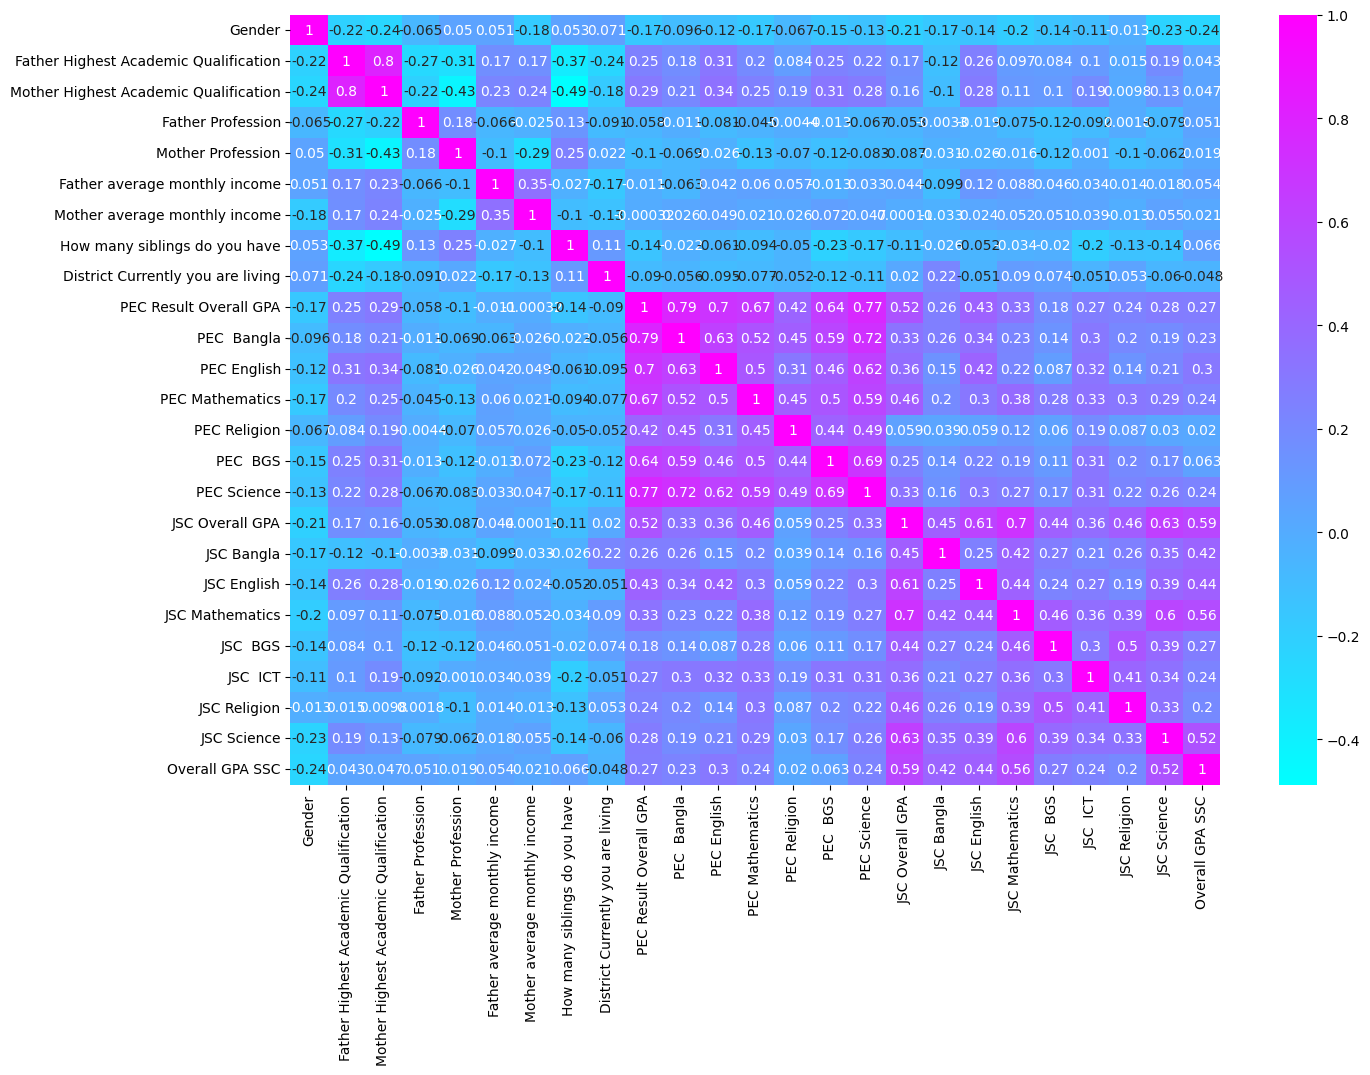

In [ ]:
figure = plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True,cmap=plt.cm.cool)

In [ ]:
X = df.drop(columns=['Overall GPA SSC'],axis=1)
y = df['Overall GPA SSC']

from sklearn.feature_selection import f_regression

# inputs:
#    X: pandas.DataFrame, features
#    y: pandas.Series, target variable
#    K: number of features to select

# compute F-statistics and initialize correlation matrix
F = pd.Series(f_regression(X, y)[0], index = X.columns)
corr = pd.DataFrame(.00001, index = X.columns, columns = X.columns)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 174 non-null    int64  
 1   Father Highest Academic Qualification  174 non-null    int64  
 2   Mother Highest Academic Qualification  174 non-null    int64  
 3   Father Profession                      174 non-null    int64  
 4   Mother Profession                      174 non-null    int64  
 5   Father average monthly income          174 non-null    int64  
 6   Mother average monthly income          174 non-null    int64  
 7   How many siblings do you have          174 non-null    int64  
 8   District Currently you are living      174 non-null    int64  
 9   PEC Result Overall GPA                 174 non-null    float64
 10  PEC  Bangla                            174 non-null    float64
 11  PEC En

In [ ]:
# initialize list of selected features and list of excluded features
selected = []
not_selected = X.columns.to_list()
scores = []

K = 24
# repeat K times
for i in range(K):

    # compute (absolute) correlations between the last selected feature and all the (currently) excluded features
    if i > 0:
        last_selected = selected[-1]
        corr.loc[not_selected, last_selected] = X[not_selected].corrwith(X[last_selected]).abs().clip(.00001)

    # compute FCQ score for all the (currently) excluded features (this is Formula 2)
    score = F.loc[not_selected] / corr.loc[not_selected, selected].mean(axis = 1).fillna(.00001)

    # find best feature, add it to selected and remove it from not_selected
    if not i==0:
        scores.append(score)
    best = score.index[score.argmax()]
    selected.append(best)
    not_selected.remove(best)

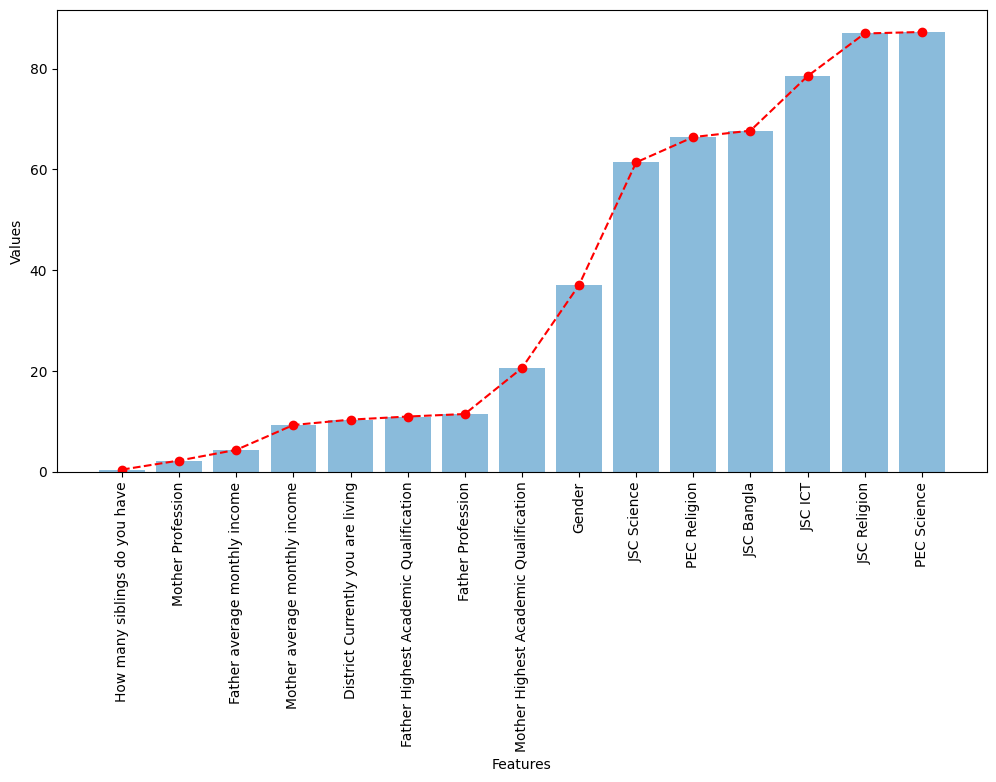

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

a = [
    ('Gender', 37.080157),
    ('Father Highest Academic Qualification', 10.996801),
    ('Mother Highest Academic Qualification', 20.609546),
    ('Father Profession', 11.492629),
    ('Mother Profession', 2.272063),
    ('Father average monthly income', 4.385158),
    ('Mother average monthly income', 9.318949),
    ('How many siblings do you have', 0.466453),
    ('District Currently you are living', 10.380747),
    ('PEC Religion', 66.427909),
    ('PEC Science', 87.278202),
    ('JSC Bangla', 67.701933),
    ('JSC ICT', 78.513125),
    ('JSC Religion', 86.978812),
    ('JSC Science', 61.416547)
]

# Sort the data in ascending order
sorted_data = sorted(a, key=lambda x: x[1])

# Extract features and values
features = [entry[0] for entry in sorted_data]
values = [entry[1] for entry in sorted_data]

# Set the color palette to "blues_d"
sns.set_palette("Blues_d")

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(features, values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Values')
plt.plot(range(len(values)), values, 'r--', marker='o')  # Add lines connecting the bars
plt.show()

In [ ]:
df.nunique()

Gender                                    2
Father Highest Academic Qualification     7
Mother Highest Academic Qualification     6
Father Profession                         3
Mother Profession                         3
Father average monthly income            46
Mother average monthly income            29
How many siblings do you have             8
District Currently you are living         8
PEC Result Overall GPA                   28
PEC  Bangla                               4
PEC English                               5
PEC Mathematics                           4
PEC Religion                              3
PEC  BGS                                  4
PEC Science                               4
JSC Overall GPA                          45
JSC Bangla                                5
JSC English                               5
JSC Mathematics                           6
JSC  BGS                                  5
JSC  ICT                                  3
JSC Religion                    

In [ ]:
df.isnull().sum()

Gender                                   0
Father Highest Academic Qualification    0
Mother Highest Academic Qualification    0
Father Profession                        0
Mother Profession                        0
Father average monthly income            0
Mother average monthly income            0
How many siblings do you have            0
District Currently you are living        0
PEC Result Overall GPA                   0
PEC  Bangla                              0
PEC English                              0
PEC Mathematics                          0
PEC Religion                             0
PEC  BGS                                 0
PEC Science                              0
JSC Overall GPA                          0
JSC Bangla                               0
JSC English                              0
JSC Mathematics                          0
JSC  BGS                                 0
JSC  ICT                                 0
JSC Religion                             0
JSC Science

In [ ]:
# X = df.drop(columns=['Overall GPA SSC'],axis=1)
# y = df['Overall GPA SSC']

# selected_features = mrmr_classif(X=X, y=y, K=24)
# X_mrmr = df[selected_features]
# X_mrmr = scale(X_mrmr)

In [ ]:
X = df[selected]
y = df['Overall GPA SSC']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   JSC Overall GPA                        174 non-null    float64
 1   Mother average monthly income          174 non-null    int64  
 2   JSC Mathematics                        174 non-null    float64
 3   JSC Science                            174 non-null    float64
 4   JSC Bangla                             174 non-null    float64
 5   JSC English                            174 non-null    float64
 6   PEC English                            174 non-null    float64
 7   Gender                                 174 non-null    int64  
 8   JSC  BGS                               174 non-null    float64
 9   PEC Result Overall GPA                 174 non-null    float64
 10  JSC  ICT                               174 non-null    float64
 11  PEC Sc

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
##Metrics

In [ ]:
l = []
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

def metrics(model_name, y_pred_test_x):
    mean = mean_absolute_error(y_test, y_pred_test_x)
    rmse = mean_squared_error(y_test, y_pred_test_x, squared=False)
    r2 = r2_score(y_test, y_pred_test_x)
    explained_variance = explained_variance_score(y_test, y_pred_test_x, sample_weight=None, multioutput='uniform_average')
    max_error_ = max_error(y_test, y_pred_test_x)
    mean_poisson_deviance_ = mean_poisson_deviance(y_test, y_pred_test_x)
    mean_gamma_deviance_ = mean_gamma_deviance(y_test, y_pred_test_x)
    mean_absolute_percentage_error_ = mean_absolute_percentage_error(y_test, y_pred_test_x)
    d2_tweedie_score_ = d2_tweedie_score(y_test, y_pred_test_x)
    mape_ = mape(y_test, y_pred_test_x)

    print("Mean Absolute Error: ",mean )
    print("Mean Squared Error: ",rmse )
    print("R2 score: ",r2 )
    print("Explained Variance: ",explained_variance )
    print("max_error: ",max_error_ )
    print("neg_mean_poisson_deviance: ",mean_poisson_deviance_ )
    print("neg_mean_gamma_deviance: ",mean_gamma_deviance_ )
    print("neg_mean_absolute_percentage_error: ",mean_absolute_percentage_error_ )
    print("d2_tweedie_score: ",d2_tweedie_score_ )
    print("mape_: ", mape_)
    l.append([model_name, explained_variance, max_error_, mean, rmse, r2, mape_, mean_poisson_deviance_, mean_gamma_deviance_, mean_absolute_percentage_error_, d2_tweedie_score_])

In [ ]:
from sklearn.inspection import permutation_importance

feature_names = ['Gender', 'F Edu', 'M Edu', 'F Prof', 'M Prof', 'F Avg Inc', 'M Avg Inc', 'Siblings', 'Distri','Pec Res Ov' ,'Pec Bangla','Pec English', 'Pec Math', 'Pec Reli', 'Pec BGS', 'Pec Sci', 'Jsc Res Ov','Jsc Bangla','Jsc english','Jsc Math','Jsc bgs','jsc ict','jsc reli', 'jsc sci']
features = np.array(feature_names)

def feature_importance(model):
    perm_importance = permutation_importance(model, X_test, y_test)
    sorted_idx = perm_importance.importances_mean.argsort()
    plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
    plt.xlabel("Permutation Importance")

def predicted_plot(y_pred_test_x):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_pred_test_x, y_test, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()
    plt.show()

In [ ]:
#### SVR

Mean Absolute Error:  0.23536853799416285
Mean Squared Error:  0.3320136440682513
R2 score:  -0.1788283807606621
Explained Variance:  -0.012047765354468831
max_error:  1.012679224910411
neg_mean_poisson_deviance:  0.023619750126750053
neg_mean_gamma_deviance:  0.005069951851510255
neg_mean_absolute_percentage_error:  0.05303477529063857
d2_tweedie_score:  -0.1788283807606621
mape_:  5.303477529063857


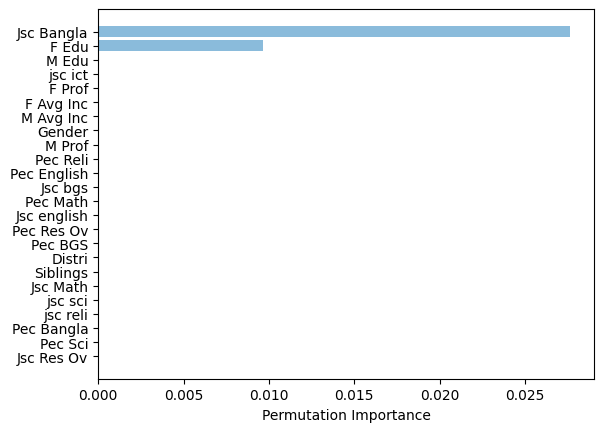

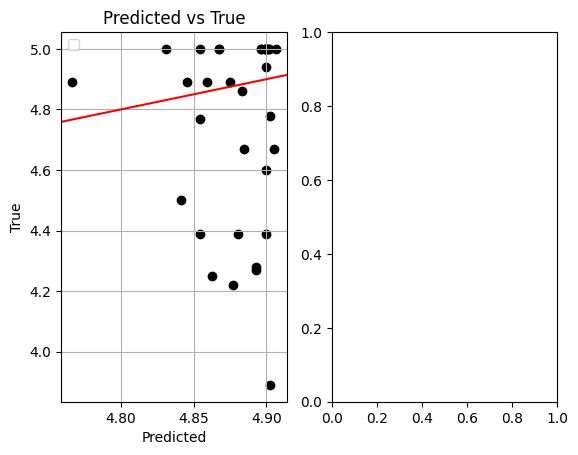

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train,y_train)

y_pred_test_x_svr = svr.predict(X_test)
metrics("SVR",y_pred_test_x_svr)
feature_importance(svr)
predicted_plot(y_pred_test_x_svr)

Mean Absolute Error:  0.20164857142857148
Mean Squared Error:  0.2819315342419149
R2 score:  0.1499860956642738
Explained Variance:  0.1626472121490412
max_error:  0.8224000000000009
neg_mean_poisson_deviance:  0.017689901374807145
neg_mean_gamma_deviance:  0.0039503785908818504
neg_mean_absolute_percentage_error:  0.043411505181008885
d2_tweedie_score:  0.1499860956642738
mape_:  4.341150518100888


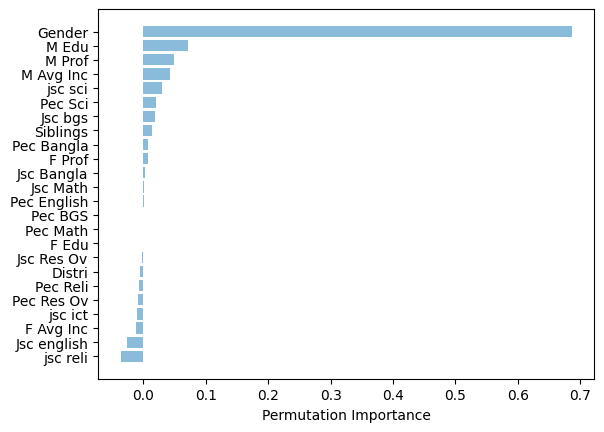

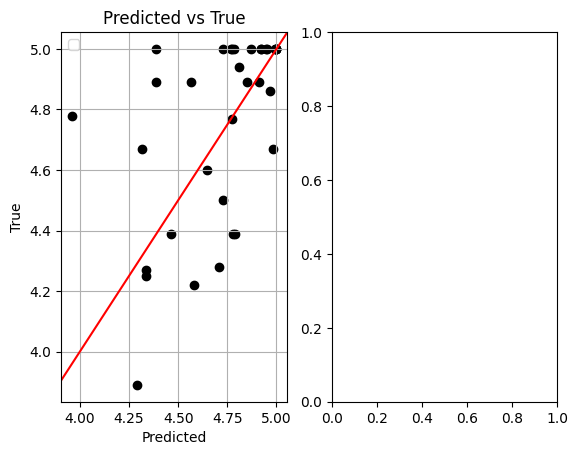

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_regressor.fit(X_train,y_train)

y_pred_test_x_rf = rf_regressor.predict(X_test)
metrics("Random Forest",y_pred_test_x_rf)
feature_importance(rf_regressor)
predicted_plot(y_pred_test_x_rf)

Mean Absolute Error:  0.20164857142857148
Mean Squared Error:  0.2819315342419149
R2 score:  0.1499860956642738
Explained Variance:  0.1626472121490412
max_error:  0.8224000000000009
neg_mean_poisson_deviance:  0.017689901374807145
neg_mean_gamma_deviance:  0.0039503785908818504
neg_mean_absolute_percentage_error:  0.043411505181008885
d2_tweedie_score:  0.1499860956642738
mape_:  4.341150518100888


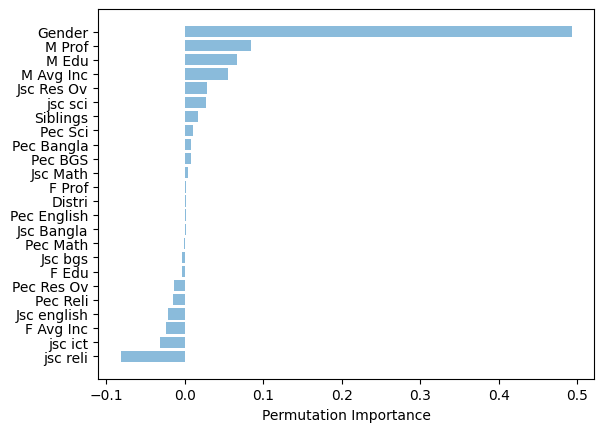

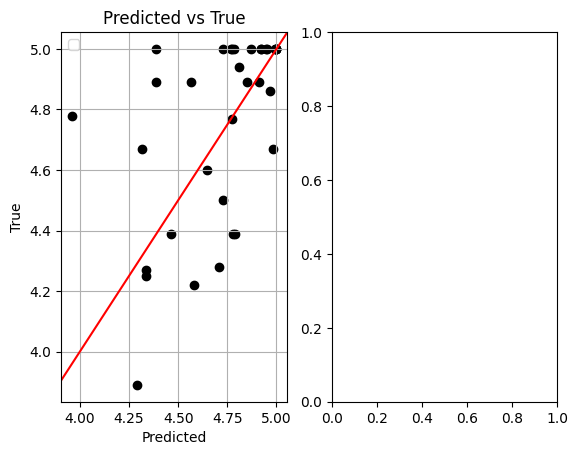

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_regressor.fit(X_train,y_train)

y_pred_test_x_rf = rf_regressor.predict(X_test)
metrics("Random Forest",y_pred_test_x_rf)
feature_importance(rf_regressor)
predicted_plot(y_pred_test_x_rf)

Mean Absolute Error:  0.24624097621217905
Mean Squared Error:  0.2974449386664757
R2 score:  0.05386766080298333
Explained Variance:  0.13887152951316128
max_error:  0.6890447307703713
neg_mean_poisson_deviance:  0.018923370276244737
neg_mean_gamma_deviance:  0.004060180625802559
neg_mean_absolute_percentage_error:  0.05182585308687171
d2_tweedie_score:  0.05386766080298344
mape_:  5.182585308687171


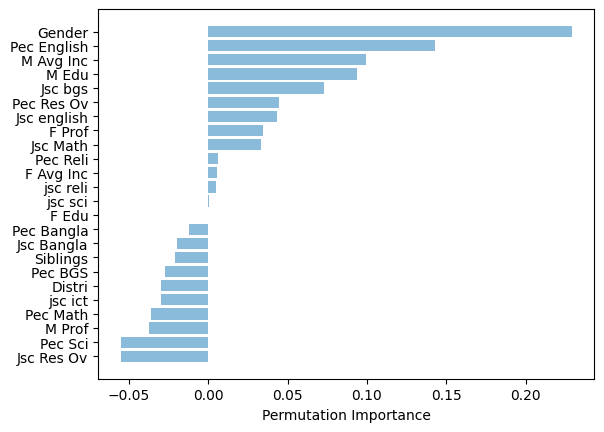

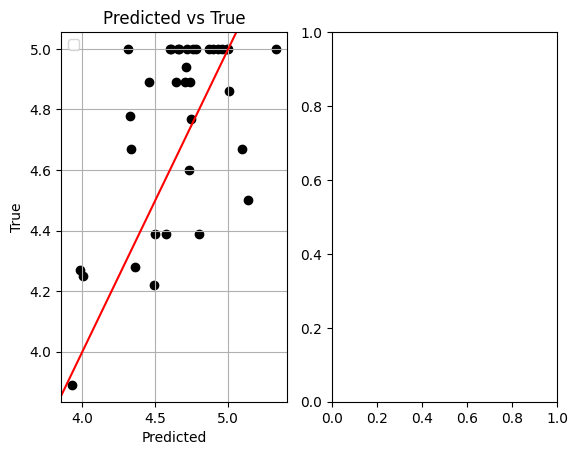

In [ ]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

y_pred_test_x_lr = lr.predict(X_test)
metrics("Linear Regression",y_pred_test_x_lr)
feature_importance(lr)
predicted_plot(y_pred_test_x_lr)

Mean Absolute Error:  0.2420109648739924
Mean Squared Error:  0.2849110453010294
R2 score:  0.1319249128787331
Explained Variance:  0.15124875653401848
max_error:  0.5831249999999999
neg_mean_poisson_deviance:  0.01769174861032329
neg_mean_gamma_deviance:  0.00386586024524521
neg_mean_absolute_percentage_error:  0.0523059888431594
d2_tweedie_score:  0.1319249128787331
mape_:  5.23059888431594


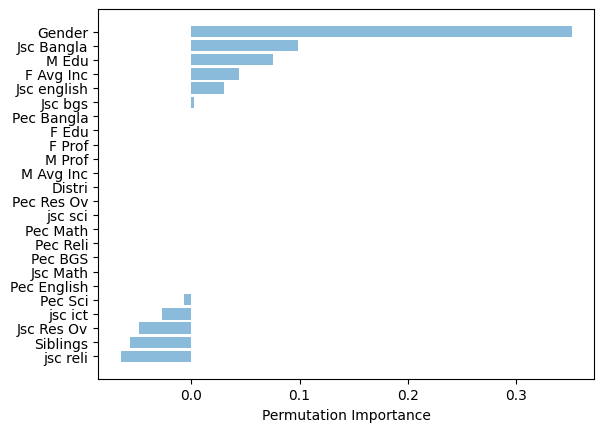

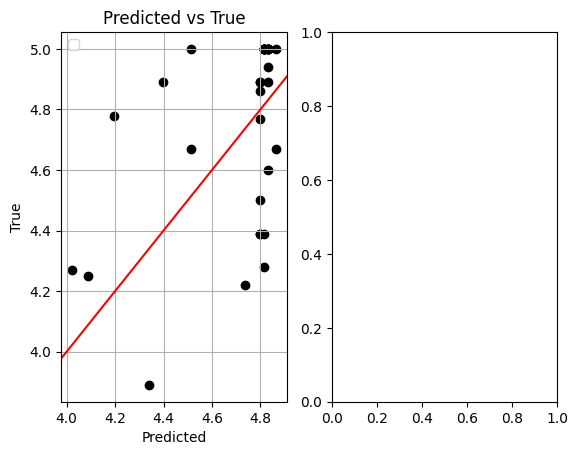

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ADA = AdaBoostRegressor(n_estimators=5, random_state=42)
ADA.fit(X_train, y_train)

y_pred_test_x_ada = ADA.predict(X_test)
metrics("ADA Boost Regressor",y_pred_test_x_ada)
feature_importance(ADA)
predicted_plot(y_pred_test_x_ada)

Mean Absolute Error:  0.18184496634347103
Mean Squared Error:  0.24654026499261858
R2 score:  0.3499983826211084
Explained Variance:  0.3556756534889849
max_error:  0.6095147132873535
neg_mean_poisson_deviance:  0.013283929728315463
neg_mean_gamma_deviance:  0.0029093001241634955
neg_mean_absolute_percentage_error:  0.039131314263684026
d2_tweedie_score:  0.3499983826211084
mape_:  3.9131314263684027


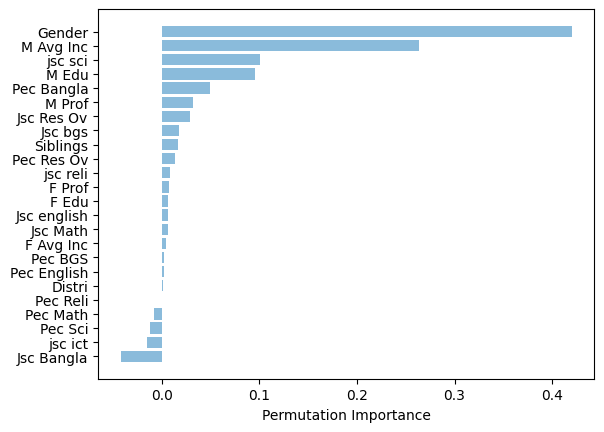

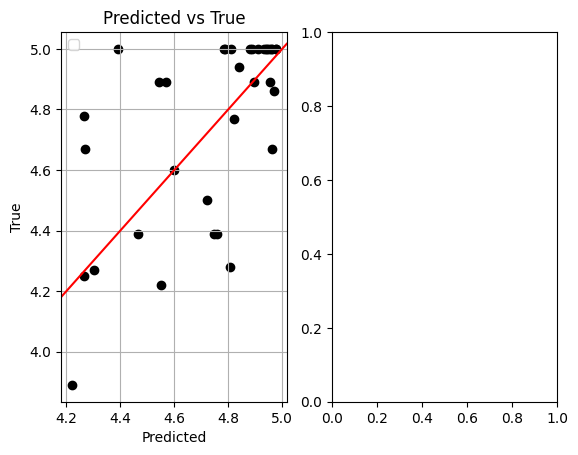

In [ ]:
import xgboost
XG = xgboost.XGBRFRegressor()
XG.fit(X_train, y_train)

y_pred_test_x_XG = XG.predict(X_test)
metrics("XGBoost",y_pred_test_x_XG)
feature_importance(XG)
predicted_plot(y_pred_test_x_XG)

In [ ]:
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(random_state=42, max_iter=2000)
MLP.fit(X_train, y_train)

y_pred_test_x_MLP = MLP.predict(X_test)
metrics("MLP",y_pred_test_x_MLP)
feature_importance(MLP)
predicted_plot(y_pred_test_x_MLP)

ValueError: Mean Tweedie deviance error with power=1 can only be used on non-negative y and strictly positive y_pred.

Mean Absolute Error:  0.23330216325789996
Mean Squared Error:  0.2672419022317195
R2 score:  0.23625596873500287
Explained Variance:  0.2447541095880762
max_error:  0.6744435779497882
neg_mean_poisson_deviance:  0.015470204162382421
neg_mean_gamma_deviance:  0.003358320327291014
neg_mean_absolute_percentage_error:  0.05047305895615824
d2_tweedie_score:  0.23625596873500287
mape_:  5.047305895615824


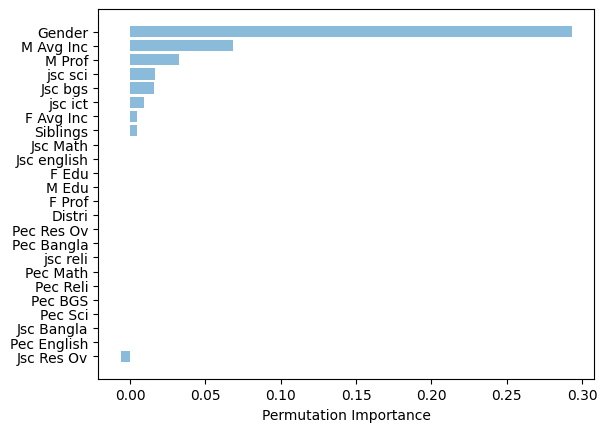

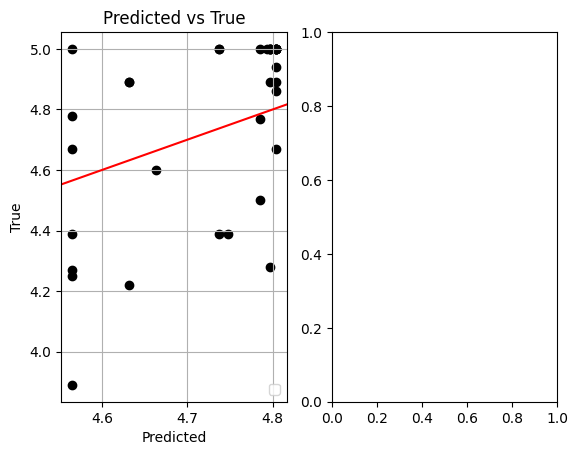

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
RADIENTG = GradientBoostingRegressor(n_estimators=5, random_state=42)
GRADIENT.fit(X_train, y_train)

y_pred_test_x_GRADIENT = GRADIENT.predict(X_test)
metrics("GRADIENT",y_pred_test_x_GRADIENT)
feature_importance(GRADIENT)
predicted_plot(y_pred_test_x_GRADIENT)

In [ ]:
estimator=[]
for i in range(1, 30):
    model = GradientBoostingRegressor(n_estimators=i, random_state=42)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    estimator.append(score)

(estimator.index(max(estimator)))+1

17

Mean Absolute Error:  0.20792014977391923
Mean Squared Error:  0.25968691928351856
R2 score:  0.2788279794472336
Explained Variance:  0.27970184372352835
max_error:  0.556094608330155
neg_mean_poisson_deviance:  0.014697320224490796
neg_mean_gamma_deviance:  0.0032104459405119506
neg_mean_absolute_percentage_error:  0.04504842215407221
d2_tweedie_score:  0.2788279794472336
mape_:  4.504842215407221


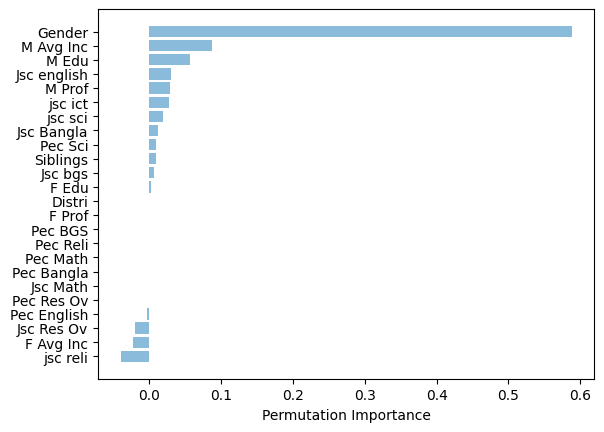

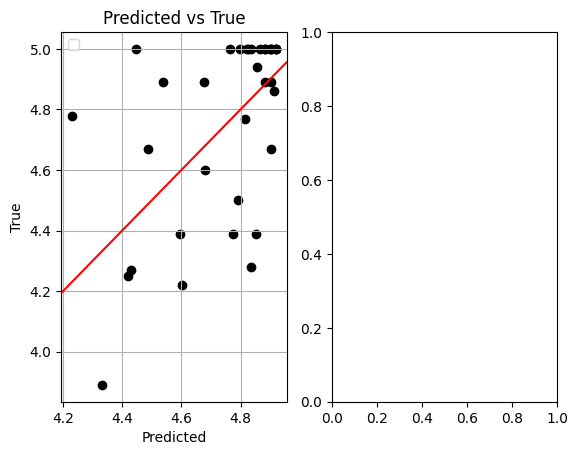

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GRADIENT = GradientBoostingRegressor(n_estimators= 17, random_state=42)
GRADIENT.fit(X_train, y_train)

y_pred_test_x_GRADIENT = GRADIENT.predict(X_test)
metrics("Optimized GRADIENT",y_pred_test_x_GRADIENT)
feature_importance(GRADIENT)
predicted_plot(y_pred_test_x_GRADIENT)

Mean Absolute Error:  0.24091428571428566
Mean Squared Error:  0.28234689909501637
R2 score:  0.14747962908967815
Explained Variance:  0.14969712947815272
max_error:  0.5989999999999989
neg_mean_poisson_deviance:  0.017205683959752756
neg_mean_gamma_deviance:  0.0037206846725035395
neg_mean_absolute_percentage_error:  0.052133082936624435
d2_tweedie_score:  0.14747962908967815
mape_:  5.213308293662443


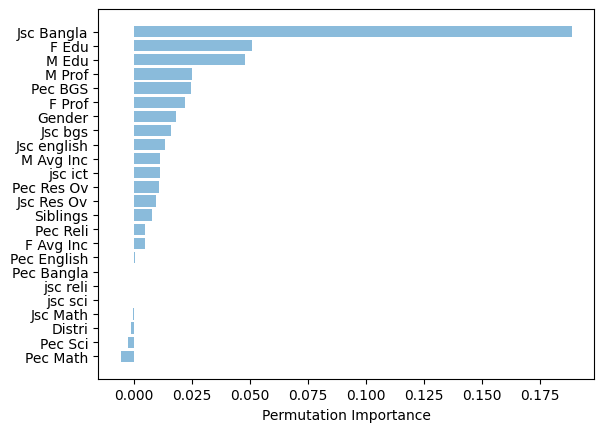

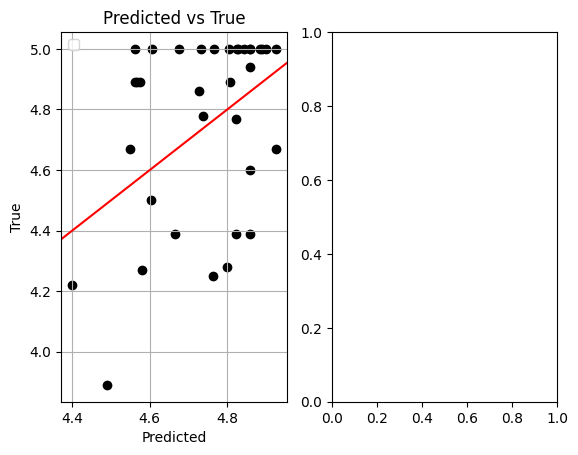

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred_test_x_knn = knn.predict(X_test)
metrics("KNN",y_pred_test_x_knn)
feature_importance(knn)
predicted_plot(y_pred_test_x_knn)

In [ ]:
df = pd.DataFrame(l, columns=["model_name", "explained_variance", "max_error", "mean", "rmse", "r2","mape", "mean_poisson_deviance", "mean_gamma_deviance", "mean_absolute_percentage_error", "d2_tweedie_score"])
df

,model_name,explained_variance,max_error,mean,rmse,r2,mape,mean_poisson_deviance,mean_gamma_deviance,mean_absolute_percentage_error,d2_tweedie_score
0,SVR,-0.012048,1.012679,0.235369,0.332014,-0.178828,5.303478,0.023620,0.005070,0.053035,-0.178828
1,Random Forest,0.162647,0.822400,0.201649,0.281932,0.149986,4.341151,0.017690,0.003950,0.043412,0.149986
2,Random Forest,0.162647,0.822400,0.201649,0.281932,0.149986,4.341151,0.017690,0.003950,0.043412,0.149986
3,Linear Regression,0.138872,0.689045,0.246241,0.297445,0.053868,5.182585,0.018923,0.004060,0.051826,0.053868
4,ADA Boost Regressor,0.151249,0.583125,0.242011,0.284911,0.131925,5.230599,0.017692,0.003866,0.052306,0.131925
5,XGBoost,0.355676,0.609515,0.181845,0.246540,0.349998,3.913131,0.013284,0.002909,0.039131,0.349998
6,GRADIENT,0.244754,0.674444,0.233302,0.267242,0.236256,5.047306,0.015470,0.003358,0.050473,0.236256
7,Optimized GRADIENT,0.279702,0.556095,0.207920,0.259687,0.278828,4.504842,0.014697,0.003210,0.045048,0.278828
8,KNN,0.149697,0.599000,0.240914,0.282347,0.147480,5.213308,0.017206,0.003721,0.052133,0.147480


In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
from shap import KernelExplainer

In [ ]:



# explain the model's predictions using SHAP
##### parenthesis
explainer = shap.KernelExplainer(GRADIENT.predict, X_train)
shap_values = explainer.shap_values(X_train)
# visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])


  0%|          | 0/139 [00:00<?, ?it/s]

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=feace79a1bfe651a0861cc2b3926811ef5bf0c47a607ab19ddc6781e2d6d25e0
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular


In [ ]:
feature_names = X_train.columns.tolist()

In [ ]:
# Convert the feature names to a list, if necessary
if not isinstance(feature_names, list):
    feature_names = list(feature_names)

In [ ]:
feature_names = X_train.columns.tolist()
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values, feature_names=feature_names, class_names=['MEDV'],
    verbose=True, mode='regression'
)

In [ ]:
j = 3  # Change the index to 4 to access the 5th row
exp = explainer.explain_instance(X_test.iloc[j], rf_regressor.predict, num_features=6)
if len(X_test) < j + 1:
    raise ValueError("The X_test DataFrame does not have enough rows.")

exp = explainer.explain_instance(X_test.iloc[j], rf_regressor.predict, num_features=6)

Intercept 4.245857018363484
Prediction_local [4.69023085]
Right: 4.774699999999998
Intercept 4.245158123215996
Prediction_local [4.68382461]
Right: 4.774699999999998


In [ ]:
# Show the predictions
exp.show_in_notebook(show_table=True)